# Mentoría 'de cómo clasificar en géneros a las canciones'
## Práctico IV : Aprendizaje no supervisado

**Antes de empezar:**
- [Instalar spaCy y el modelo de lenguaje con el que van a trabajar](https://spacy.io/models#quickstart)

**Consideraciones:**
- Se evalúa el estilo y prolijidad del código.
- Se permite hacer trabajo extra, siempre y cuando las actividades básicas estén resueltas.

**Recomendación:**
- Hay muchos ejemplos de código en internet, no se sientan obligados a implementar todo desde cero.
- La cantidad de líneas de código del esqueleto no es estricta, pueden completarlo con más (o menos) líneas.

### Librerías

!pip3 install spotipy
!pip3 install pandas
!pip3 install spacy
!pip3 install pymusixmatch
!pip3 install nltk
!pip3 install sklearn

# Agregar las librerías extra que se utilicen en esta celda y la siguiente

In [1]:
import ast
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '46b333d567314a89a6254b6c6b054be6'
client_secret = '9d922c3613e441518349dcf55f7d5853'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


## Funciones Generales

In [2]:
def print_kmeans_inertia(df, cluster_range=10):
    scores = [KMeans(n_clusters=i+2).fit(df).inertia_ for i in range(cluster_range)]

    plt.plot(np.arange(2, cluster_range + 2), scores)
    plt.xlabel('Number of clusters')
    plt.ylabel("Inertia")
    plt.title("Inertia of k-Means versus number of clusters")
    plt.show()
    
def get_df_songs(file_path = "./final_big.csv"):
    songs_base = pd.read_csv(file_path,sep="#")
    songs_base["genres"]=songs_base["genres"].apply(lambda x: x.replace("[","").replace("]","").replace("'","").split(","))
    songs_base["artists"]=songs_base["artists"].apply(lambda x: x.replace("[","").replace("]","").replace("'","").split(","))
    audio_thing= songs_base["audio_features"].apply(lambda x: ast.literal_eval(x))
    audio_features_base = pd.DataFrame(list(audio_thing))
    audio_features = audio_features_base.columns

    df_song_base = songs_base.reset_index(drop=True)
    audio_features_base = audio_features_base.reset_index(drop=True)
    df_song_base = pd.concat([df_song_base,audio_features_base],axis=1)
    return df_song_base

def scale_df_song(df, features_columns):
    df_features = df[features_columns]
    scaler = StandardScaler()
    df_scale = scaler.fit_transform(df_features)
    df_features_scale = pd.DataFrame(df_scale, columns=features_columns)
    df_features["song_name"]= df["song_name"]
    df_features["artists"]= df["artists"]

    df_features_scale["song_name"]=df["song_name"]
    df_features_scale["artists"]= df["artists"]

    
    return df_features, df_features_scale
    
def print_Silohuette(n_clusters, cluster_labels, df_skills, title):

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_skills) + (n_clusters + 1) * 10])

    #cluster_labels = km.labels_

    silhouette_avg = silhouette_score(df_skills, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(df_skills, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))    
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle((title),
                 fontsize=14, fontweight='bold')

    plt.show()

    

### Dependencias y acceso a APIs

In [3]:
'''import pandas as pd
import numpy as np
import spotipy
import spacy
from spotipy.oauth2 import SpotifyClientCredentials
from musixmatch import Musixmatch

client_id = '46b333d567314a89a6254b6c6b054be6'
client_secret = '9d922c3613e441518349dcf55f7d5853'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

nlp = spacy.load("en_core_web_sm") # completar con el modelo que van a utilizar

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
musixmatch = Musixmatch('1aa5272f4402bf2f082ad2f3958c2c62') # se puede reemplazar por otra API si da mejores resultados
'''

'import pandas as pd\nimport numpy as np\nimport spotipy\nimport spacy\nfrom spotipy.oauth2 import SpotifyClientCredentials\nfrom musixmatch import Musixmatch\n\nclient_id = \'46b333d567314a89a6254b6c6b054be6\'\nclient_secret = \'9d922c3613e441518349dcf55f7d5853\'\nclient_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)\n\nnlp = spacy.load("en_core_web_sm") # completar con el modelo que van a utilizar\n\nsp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)\nmusixmatch = Musixmatch(\'1aa5272f4402bf2f082ad2f3958c2c62\') # se puede reemplazar por otra API si da mejores resultados\n'

### Funciones para gráficos
Estas funciones se utilizarán __sólo en el inciso 4)__

In [4]:
import matplotlib.pyplot as plt

def plot2D(title, X, colors):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=colors)
    plt.xlim(-50, 200)
    plt.ylim(-50, 170)
    ax.set_title(title)
    ax.set_xlabel('First component')
    ax.set_ylabel('Second Component')
    plt.colorbar(scatter);
    plt.plot()
    
def plot3D(title, X, colors):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors)
    plt.xlim(-50, 200)
    plt.ylim(-50, 170)
    ax.set_title(title)
    ax.set_xlabel('First component')
    ax.set_ylabel('Second component')
    ax.set_zlabel('Third component')
    plt.colorbar(scatter)

### 1) Recopilar los datos obtenidos en los prácticos anteriores

Para esta parte consideraremos [la playlist colaborativa de la mentoría](https://open.spotify.com/playlist/2IuD0qZb14cji5y52crdsO?si=nfHRPDquQRyotEcXc4tG7Q), de esta obtendremos:
- Las features del audio de las canciones
- Las features textuales de sus letras

Además es necesario aplicar el mismo preprocesamiento que aplicamos en los prácticos anteriores para ambos tipos de features (el preprocesamiento del p1 a las features de audio y el de p2 al de features textuales). En este caso la etiqueta no se utilizará para el proceso de clasificación dada la naturaleza no supervisada de nuestro clasificador.

Luego, se obtendrá como resultado el conjunto de variables X.

La última tarea de este inciso será aplicar escalado estándar a las features de X. La estandarización consiste en  reescalar las features de modo que estas tengan las propiedades de una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal) estándar (media = 0 y desviación estándar = 1). Esta tarea es [importante](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html) en nuestro caso, ya que permite una mejor visualización de los clusters obtenidos por nuestro algoritmo.

**Recomendaciones:**
- Obtener las features por separado y hacer un join de los datasets.
- Prestar atención a la [documentación de sklearn](https://scikit-learn.org/stable/)
- Si usan features categóricas, ENCODEARLAS!

In [5]:
"""
Obtener features de audio
Obtener features de texto
Combinarlas en un DataFrame
"""

df_song_base = get_df_songs()
df_song_base.columns
features_columns = ['lyrics_sentiment', 'danceability', 'energy', 'key', 
                     'loudness', 'mode', 'speechiness', 'acousticness', 
                     'instrumentalness', 'liveness', 'valence', 'tempo']

df_features, df_features_scale = scale_df_song(df_song_base, features_columns)


X_unscaled = df_features
X_scaled = df_features_scale

<ipython-input-2-81329a318f69>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["song_name"]= df["song_name"]
<ipython-input-2-81329a318f69>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["artists"]= df["artists"]


### 2) Elegir un número óptimo de clusters

En este punto buscaremos el número de clusters que queremos para correr K-means obteniendo los mejores resultados. Para esto utilizaremos dos criterios de selección:
- Primero, el "método del codo" (Elbow method). Este es una técnica (heurística) muy popular en el aprendizaje no supervisado que consiste en correr el algoritmo con diferentes cantidades __k__ de clusters, calculando para cada caso la suma de distancias cuadradas de cada punto al centro asignado para su cluster (PISTA: estos valores se pueden obtener como un atributo del clasificador luego de ajustarlo a __X_scaled__). Luego graficamos para cada __k__ el valor obtenido, esto nos dará un gráfico con forma de brazo (curva) en el cual el codo del mismo (el punto de inflexión de la curva) es un buen valor para __k__.
- Segundo, el [Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) nos da un coeficiente que va de -1 (peor) a 1 (mejor) y que nos dice qué tan similar es un punto a los demás dentro de su cluster y qué tan diferente es de los puntos en el resto de los clusters. En este caso nos quedaremos con el valor de k que maximice el Silhouette score para __X_scaled__.

La tarea consiste en obtener para cada caso el k que de mejores resultados de acuerdo a los gráficos obtenidos.

<IPython.core.display.Javascript object>


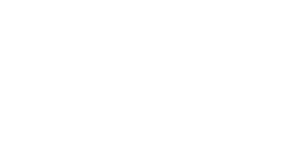

In [6]:
%matplotlib notebook

print_kmeans_inertia(X_scaled.drop(['artists','song_name'], axis=1), cluster_range=16)

For n_clusters = 4 The average silhouette_score is : 0.13413146807236614


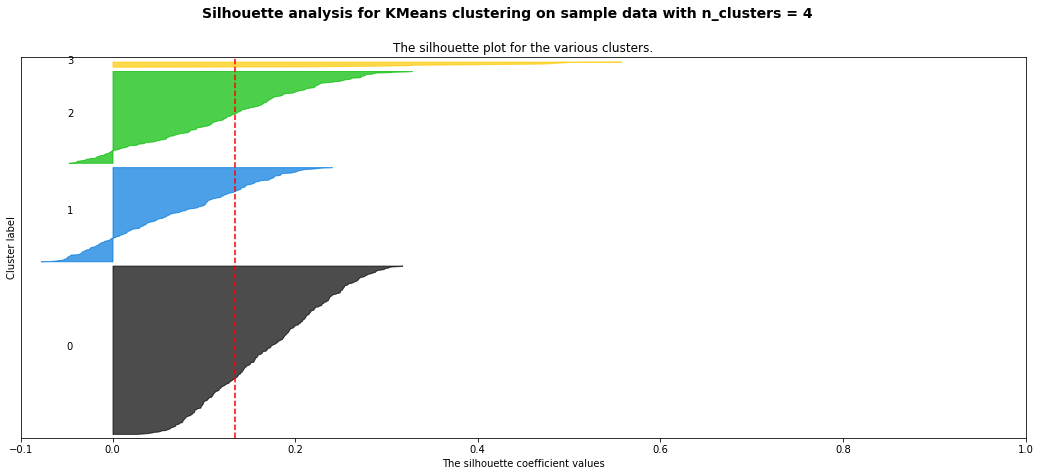

For n_clusters = 6 The average silhouette_score is : 0.13819261033199995


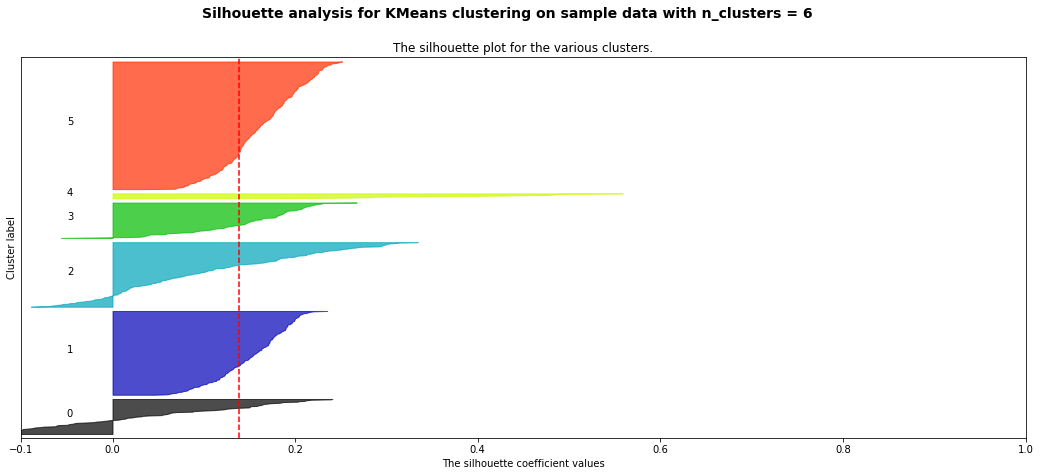

For n_clusters = 7 The average silhouette_score is : 0.13185394784978574


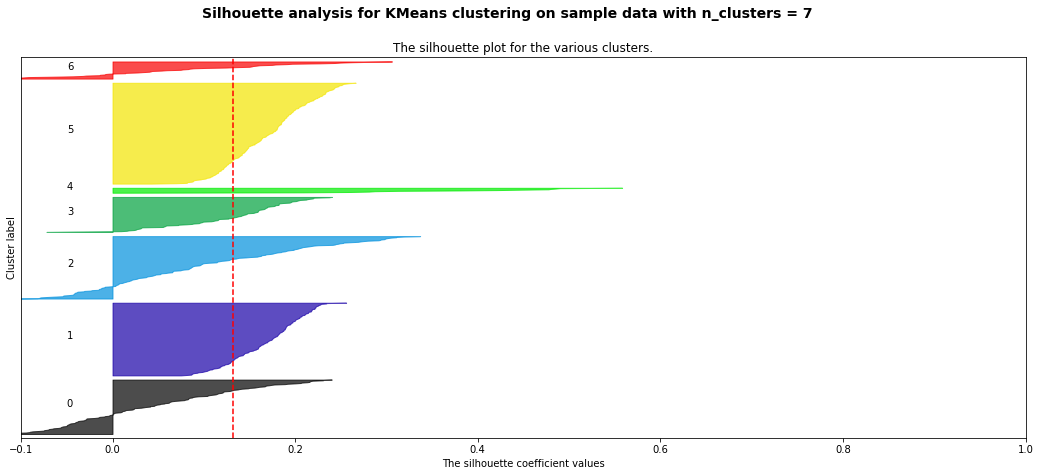

For n_clusters = 8 The average silhouette_score is : 0.13743350675838198


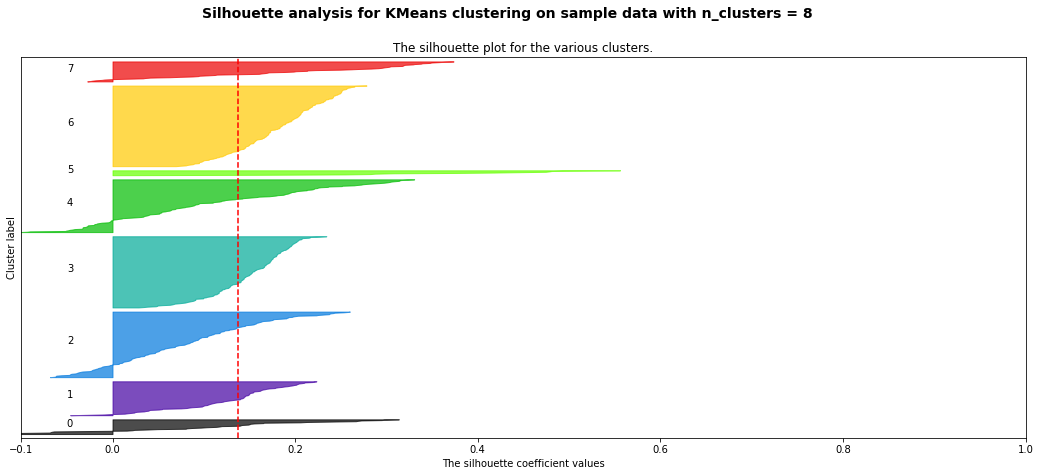

For n_clusters = 9 The average silhouette_score is : 0.13530150880851657


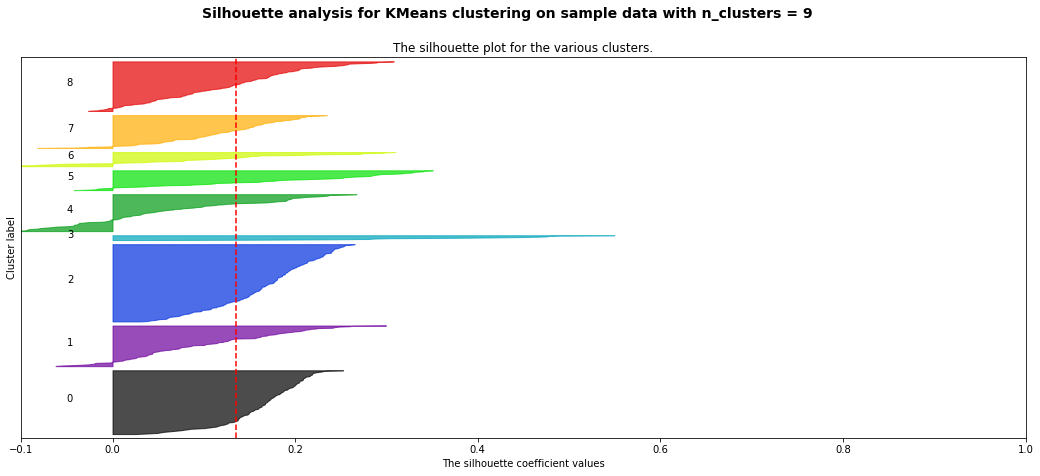

For n_clusters = 10 The average silhouette_score is : 0.12349126419681551


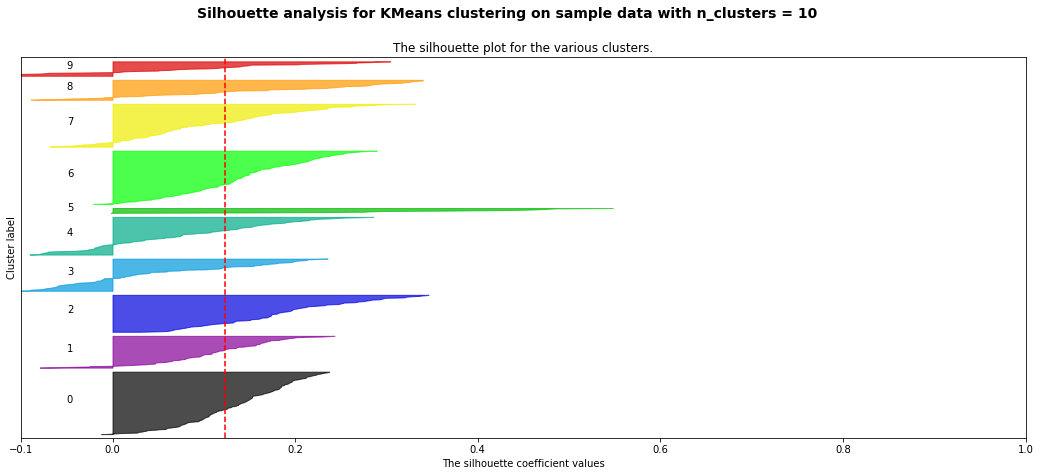

In [7]:
%matplotlib inline

n_clusters_list = [4,6,7,8,9, 10]
for n in n_clusters_list:
    n_cluster_kmean =n
    km = KMeans(n_clusters=n_cluster_kmean, random_state=10)
    km.fit(X_scaled.drop(['artists','song_name'], axis=1))
    title = "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_cluster_kmean
    print_Silohuette(n_cluster_kmean, km.labels_, X_scaled.drop(['artists','song_name'], axis=1), title)



Los valores de k elegidos de acuerdo a estas dos reglas son:
- k1 = 4
- k2 = 8

### 3) Correr K-Means con los k elegidos

En este punto corremos de nuevo el algoritmo con los __k1__ y __k2__ elegidos en __2)__ y almacenaremos los resultados obtenidos en __X_preds_k1__ y __X_preds_k2__. Recuerden que el output de la predicción es un conjunto de __n__ (= #Canciones) etiquetas que nos dicen en qué cluster está cada canción __Xi__, por lo que deberán crear una tabla o mecanismo para obtener, además de las predicciones, los clusters como listas de canciones para cada __k__ elegido para su posterior análisis en el informe.

In [8]:
k1_nclusters = 4
k2_nclusters = 8
km_n_k1 = KMeans(n_clusters=k1_nclusters, random_state=10)
km_n_k2 = KMeans(n_clusters=k2_nclusters, random_state=10)

X_preds_k1 = km_n_k1.fit(X_scaled.drop(['artists','song_name'], axis=1)).labels_
X_preds_k2 = km_n_k2.fit(X_scaled.drop(['artists','song_name'], axis=1)).labels_

song_clusters_k1 = df_features_scale.copy()
song_clusters_k1['cluster'] = X_preds_k1

song_clusters_k2 = df_features_scale.copy()
song_clusters_k2['cluster'] = X_preds_k2

### 4) Graficar los clusters obtenidos

Para esta actividad utilizaremos las funciones __plot2D__ y __plot3D__ para graficar los clusters que obtuvimos en el ejercicio anterior. Previamente, se debe realizar una reducción de dimensiones al conjunto de datos __X_scaled__ para poder graficar los puntos dos y tres dimensiones, respectivamente. Por último, los colores de los puntos graficados estarán dados por cluster al que pertenece cada canción.

[]

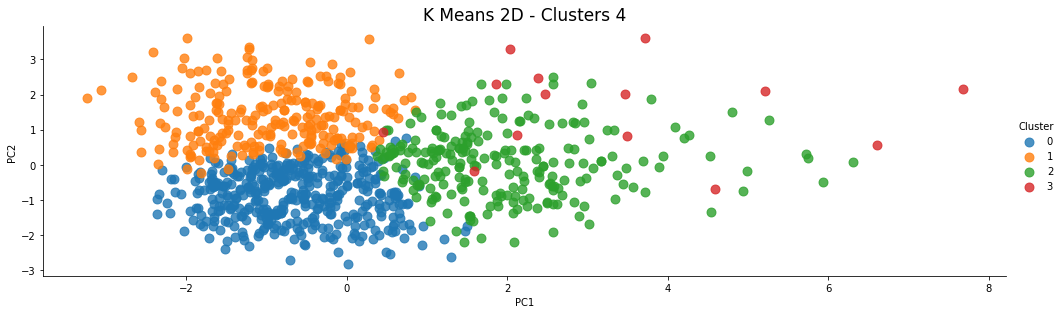

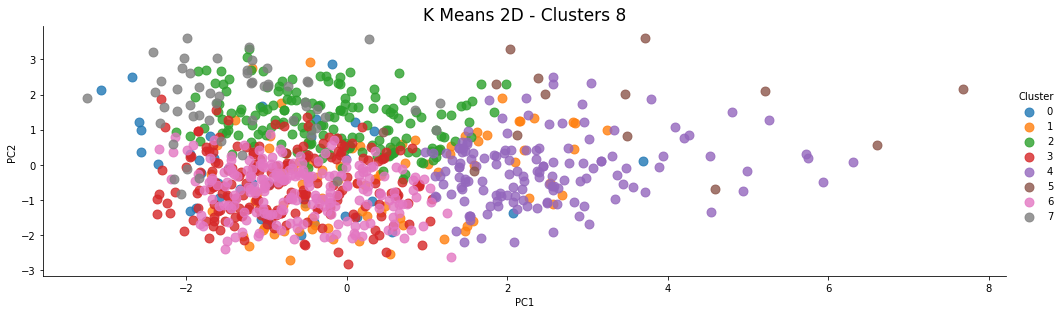

In [9]:
%matplotlib inline

pca_2D = decomposition.PCA(n_components=2, random_state=42)
pca_3D = decomposition.PCA(n_components=3, random_state=42)

pc_2D = pca_2D.fit_transform(X_scaled.drop(['artists','song_name'], axis=1))




'''
X_scaled_2D =
X_scaled_3D =

plot2D('K-Means with k = ', , )
plot3D('K-Means with k = ', , )
'''

df_pca_2D_k1 = pd.DataFrame(data=pc_2D, columns=['PC1', 'PC2'])
df_pca_2D_k1['Cluster'] = X_preds_k1

df_pca_2D_k2 = pd.DataFrame(data=pc_2D, columns=['PC1', 'PC2'])
df_pca_2D_k2['Cluster'] = X_preds_k2

sns.lmplot(x='PC1', y='PC2', data=df_pca_2D_k1,fit_reg=False,hue='Cluster',legend=True, scatter_kws={"s":80},height=4, aspect=3.5)
ax = plt.gca()
ax.set_title("K Means 2D - Clusters {}".format(k1_nclusters), fontsize=17)

sns.lmplot(x='PC1', y='PC2', data=df_pca_2D_k2,fit_reg=False,hue='Cluster',legend=True, scatter_kws={"s":80},height=4, aspect=3.5)
ax = plt.gca()
ax.set_title("K Means 2D - Clusters {}".format(k2_nclusters), fontsize=17)
plt.plot()

<IPython.core.display.Javascript object>


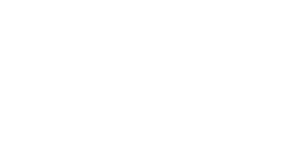

<IPython.core.display.Javascript object>


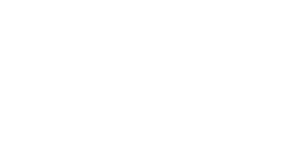

In [10]:
%matplotlib notebook

pca_3D = decomposition.PCA(n_components=3, random_state=42)

pc_3D = pca_3D.fit_transform(X_scaled.drop(['artists','song_name'], axis=1))

df_pca_3D_k1 = pd.DataFrame(data=pc_3D, columns=['PC1', 'PC2', 'PC3'])
df_pca_3D_k1['Cluster'] = X_preds_k1

fig = plt.figure(figsize=(10,10))
fig.suptitle('K means 3D - Clusters {}'.format(k1_nclusters))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca_3D_k1['PC1'], df_pca_3D_k1['PC2'], df_pca_3D_k1['PC3'], c=df_pca_3D_k1['Cluster'], s=15)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

<IPython.core.display.Javascript object>


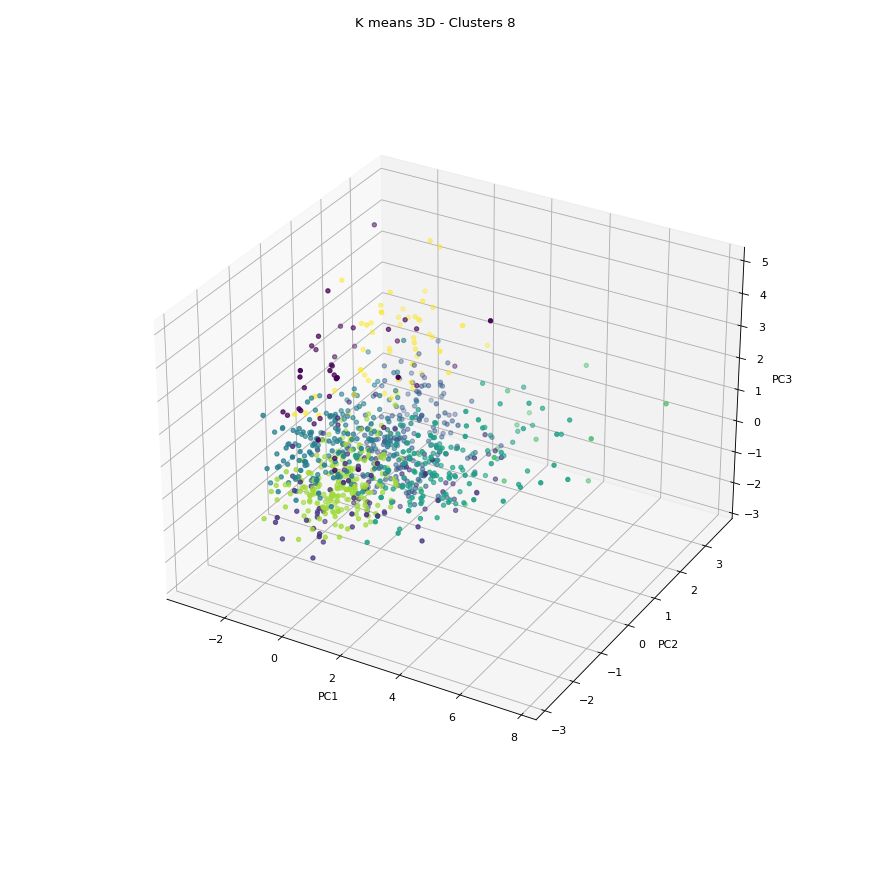

In [11]:
%matplotlib notebook

df_pca_3D_k2 = pd.DataFrame(data=pc_3D, columns=['PC1', 'PC2', 'PC3'])
df_pca_3D_k2['Cluster'] = X_preds_k2



fig = plt.figure(figsize=(10,10))
fig.suptitle('K means 3D - Clusters {}'.format(k2_nclusters))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca_3D_k2['PC1'], df_pca_3D_k2['PC2'], df_pca_3D_k2['PC3'], c=df_pca_3D_k2['Cluster'], s=15)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

### 5) Informe

Por último, deberán escribir un informe en el cual:
1. Muestren los clusters obtenidos en __3)__ como listas de canciones

2. Describan cualitativamente (e intuitivamente) estos clusters para cada __k__ elegido de acuerdo al contenido de los mismos, por ejemplo: 
    - El cluster 1 presenta canciones de géneros subsaharianos y es el más amplio debido a que..., el 2 de géneros tribales del cuerno de África, el 3...
    - Los clusters x0, x1, ... , xn no presentan algún patrón observable, pero xn+1 y xn+4 tienen...
4. Digan cuál k les dio resultados más coherentes y/o interpretables
Dado la naturaleza multilabel de la variable categórica del genero. Por cada grupo se puede tener muchos generos, sin embargo se puede observar que los generos son bastante variados y se repiten en muchos grupos. Con K= 4 esa repetición se aprecia demasiado. Por otro lado, para K=8 se puede observar algunos agrupamientos coherentes como por ejemplo el grupo 0 (latin hip-pop, reggeton), grupo 

5. Comparen los resultados obtenidos con aprendizaje no supervisado (con el mejor de los dos k) vs supervisado de manera cualitativa. Por ejemplo: nos parece mejor/peor/distinto/indistinto el modelo de aprendizaje no supervisado/supervisado en esta tarea porque...
Comparando los resultados obtenidos con aprendizaje no supervizado con supervisado, no nos parecio ni bueno ni malo. Nos parecieron muy buenas herramientas que aplicadas juntas pueden ayudar a entender muchas cosas. Durante la aplicacion del aprendizaje supervizado no pudimos obtener buenos acurrancy para la predicciones de los genero, ahora, aplicando aprendizaje no supervizado no dimos cuenta el es muy probable que la clasficiación proporcionada por spotify no parece ser una buena clasificación. Haciendo instropección entendemos que la principal causa puede llegar a ser que spotify no proporciona generos a los temas, se los asiga al artista. Nosotros al asignar los generos de los artistas a los temas musicales introducimos mucho ruido a nuestro dataset. 
Nos dimos cuenta que cuando tenemos dudas de nuestro datos al hacer predicciones, la aplicación de aprendizaje no supervizado puede ser una buena herramienta para varificar la integridad de los datos.

## Análisis de Clústers

In [12]:
cluster_1 = song_clusters_k1[song_clusters_k1["cluster"] == 1]
cluster_2 = song_clusters_k1[song_clusters_k1["cluster"] == 2]
cluster_3 = song_clusters_k1[song_clusters_k1["cluster"] == 3]
cluster_4 = song_clusters_k1[song_clusters_k1["cluster"] == 0]

In [13]:
cluster_1.head(10)["song_name"]

6                      Robo un Auto
8         Deseando Destruir y Matar
9                     Nido De Almas
12                      Destruccion
13          Sintoma De La Infeccion
20                         Brujería
25                     Mujer Amante
28                 Arrancacorazones
30          Aún Estás En Mis Sueños
31    La Leyenda Del Hada Y El Mago
Name: song_name, dtype: object

In [14]:
cluster_2.head(10)["song_name"]

1                     Anoche
2                  Sin Rumbo
3     La Gata Bajo la Lluvia
4                    Querida
5          Otro Día para Ser
11                   Asi Fue
14        Un Beso Y Una Flor
15                     Libre
16            Como yo te amo
24         Rata De Dos Patas
Name: song_name, dtype: object

In [15]:
cluster_3.head(10)["song_name"]

0                       Desafío
57     En la Ciudad de la Furia
200           La Casa Fantasmal
225                    Intropía
238                    Outropía
253                      Umbral
263           Horizonte Perdido
284                    No Class
287                        Piel
725               Caballo negro
Name: song_name, dtype: object

In [16]:
cluster_4.head(10)["song_name"]

7                     El Pibe Tigre
10                    Malon Mestizo
17                  Niña de Tilcara
18               El Viejo De Arriba
19                 No Se Llama Amor
21    No Me Arrepiento de Este Amor
22               Una Ráfaga de Amor
23                      Una Cerveza
26                Lamento Boliviano
27                 La Muralla Verde
Name: song_name, dtype: object

In [17]:
song_clusters_k1.describe()

,lyrics_sentiment,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
count,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,920.000000
mean,1.544658e-17,-5.483536e-16,-6.564797e-16,-4.633974e-17,-6.178632e-17,7.723291e-17,-3.089316e-17,1.467425e-16,-7.723291e-18,-1.004028e-16,3.861645e-16,-1.699124e-16,0.818478
std,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,0.866927
min,-4.165795e-01,-2.883125e+00,-3.485146e+00,-1.515379e+00,-4.802998e+00,-1.282060e+00,-7.191803e-01,-9.671373e-01,-1.771576e-01,-9.724316e-01,-2.451127e+00,-2.208097e+00,0.000000
25%,-4.165795e-01,-6.254193e-01,-6.415838e-01,-9.495717e-01,-4.387617e-01,-1.282060e+00,-5.679200e-01,-8.193644e-01,-1.771576e-01,-6.388920e-01,-8.019844e-01,-9.363164e-01,0.000000
50%,-4.165795e-01,1.127407e-01,2.050158e-01,4.059050e-02,1.703952e-01,7.799946e-01,-3.744661e-01,-3.747016e-01,-1.771456e-01,-4.150365e-01,1.088602e-01,6.695751e-02,1.000000
75%,-4.127378e-01,7.361867e-01,8.012919e-01,1.030753e+00,6.729153e-01,7.799946e-01,9.444076e-02,5.418855e-01,-1.760052e-01,3.652169e-01,8.392853e-01,7.095862e-01,2.000000
max,2.784886e+00,2.416997e+00,1.510073e+00,1.596560e+00,1.748620e+00,7.799946e-01,7.112918e+00,3.128507e+00,9.535519e+00,3.785369e+00,1.652813e+00,2.629369e+00,3.000000


In [18]:
def get_genres_series_from_group( df, column_group_name, group_label, col_position = 'genres' ):
    array=[]
    group = df[df[column_group_name] == group_label]
    for x in group[col_position]:
        array.extend(x)    
    return pd.Series(array)

def get_colum_series_by_group(df, column_name, group_label):
    return df[df.group_label == group_label][column_name]

df_song_base_group = df_song_base.copy()
df_song_base_group['clusters_K1'] = X_preds_k1
df_song_base_group['clusters_K2'] = X_preds_k2

Text(0.5, 1.0, 'Grupo 0 - Genres')

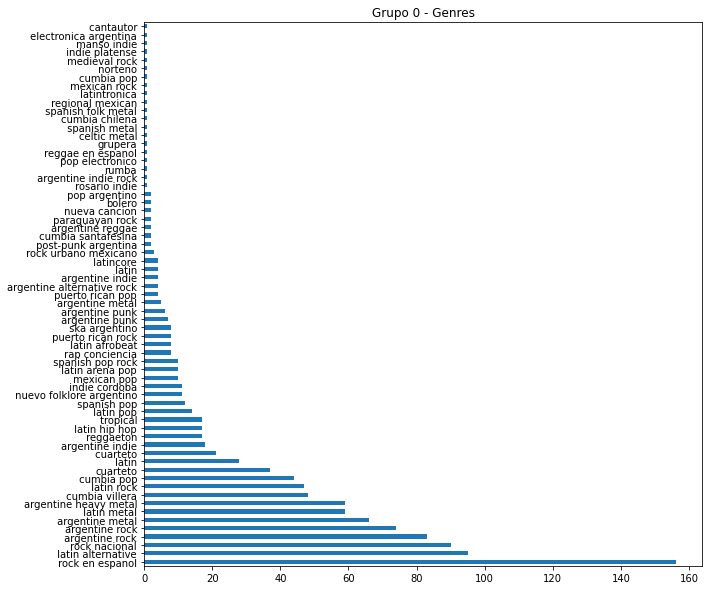

In [20]:
%matplotlib inline
df_song_base_group = df_song_base.copy()
df_song_base_group['clusters_K1'] = X_preds_k1
df_song_base_group['clusters_K2'] = X_preds_k2

(fig, axs) = plt.subplots(figsize=(10, 10), sharey=False)
get_genres_series_from_group(df_song_base_group, column_group_name='clusters_K1', 
                             group_label=1).value_counts().plot(kind='barh')
axs.set_title('Grupo 0 - Genres')


Text(0.5, 1.0, 'Grupo 0 - Genres')

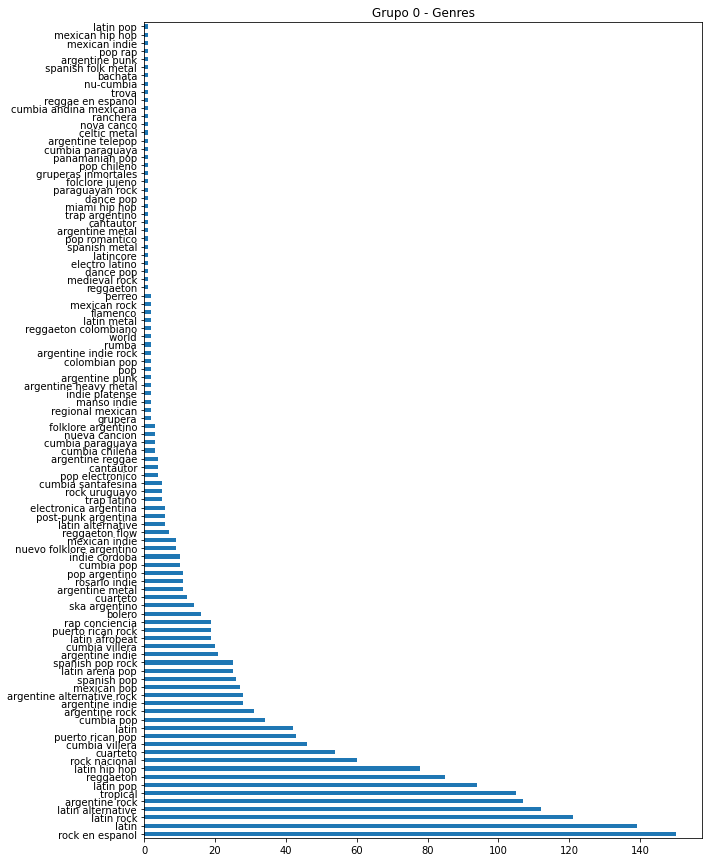

In [37]:
(fig, axs) = plt.subplots(figsize=(10, 15), sharey=False)
get_genres_series_from_group(df_song_base_group, column_group_name='clusters_K1', 
                             group_label=0).value_counts().plot(kind='barh')
axs.set_title('Grupo 0 - Genres')

Text(0.5, 1.0, 'Grupo 1 - Genres')

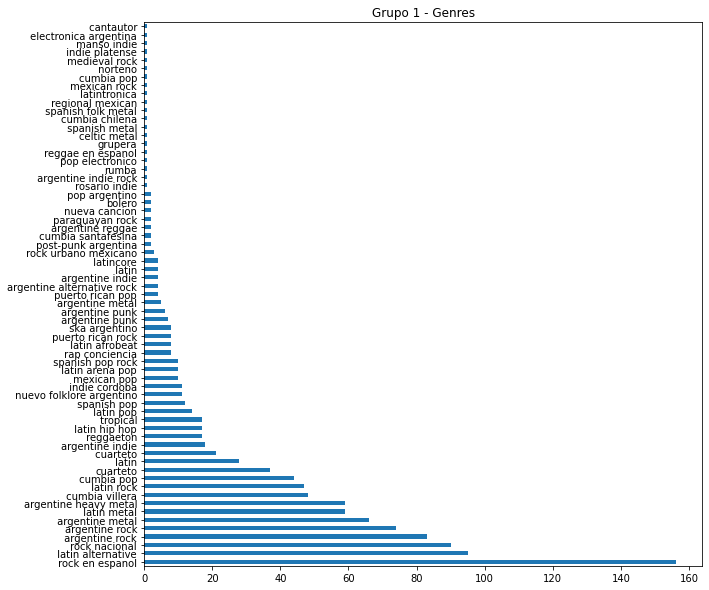

In [23]:
(fig, axs) = plt.subplots(figsize=(10, 10), sharey=False)
get_genres_series_from_group(df_song_base_group, column_group_name='clusters_K1', 
                             group_label=1).value_counts().plot(kind='barh')
axs.set_title('Grupo 1 - Genres')

Text(0.5, 1.0, 'Grupo 2 - Genres')

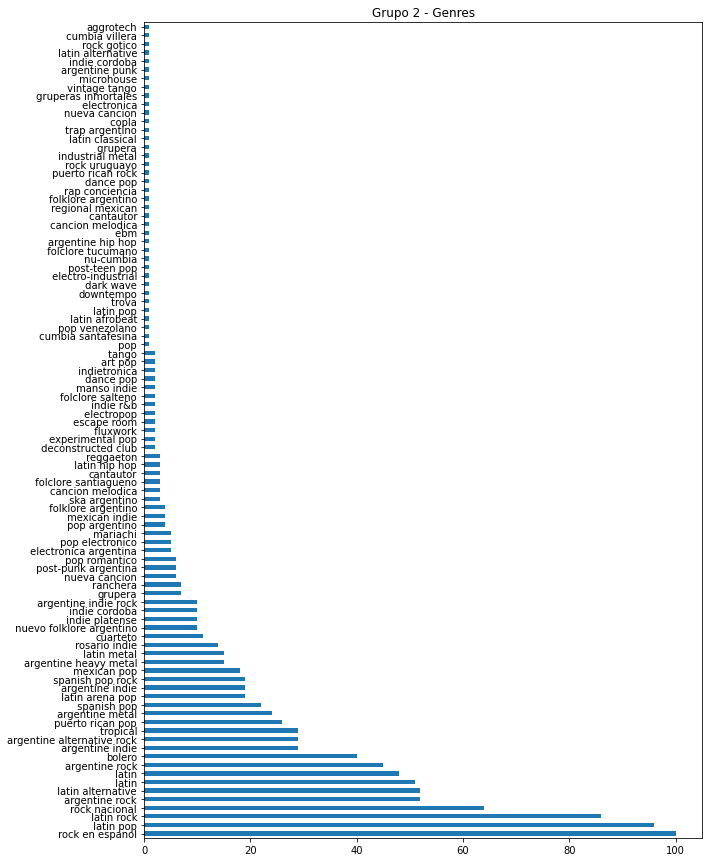

In [38]:
(fig, axs) = plt.subplots(figsize=(10, 15), sharey=False)
get_genres_series_from_group(df_song_base_group, column_group_name='clusters_K1', 
                             group_label=2).value_counts().plot(kind='barh')
axs.set_title('Grupo 2 - Genres')

Text(0.5, 1.0, 'Grupo 3 - Genres')

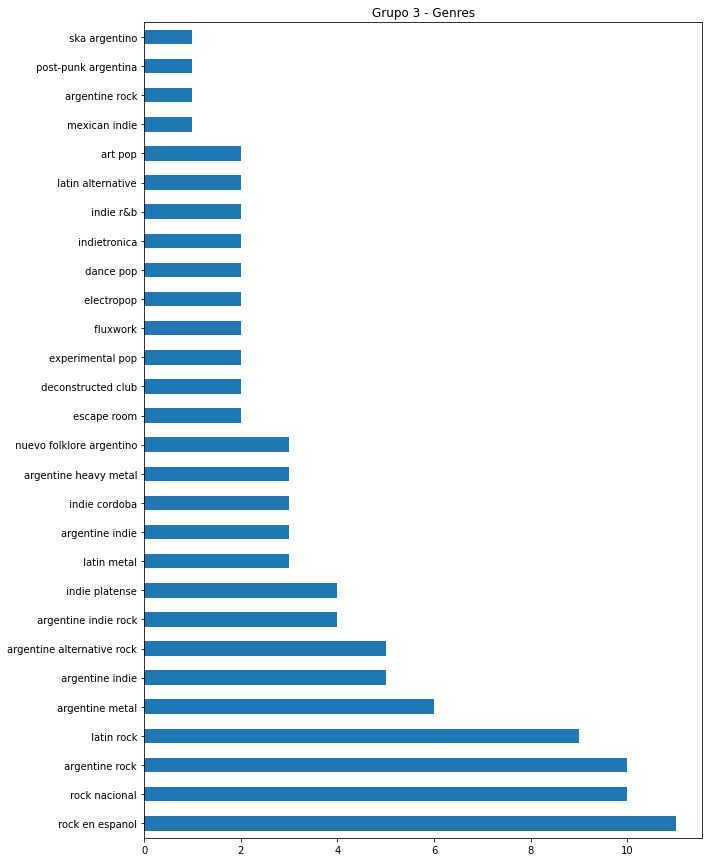

In [28]:
(fig, axs) = plt.subplots(figsize=(10, 15), sharey=False)
get_genres_series_from_group(df_song_base_group, column_group_name='clusters_K1', 
                             group_label=3).value_counts().plot(kind='barh')
axs.set_title('Grupo 3 - Genres')

Text(0.5, 1.0, 'K2- Grupo 0 - Genres')

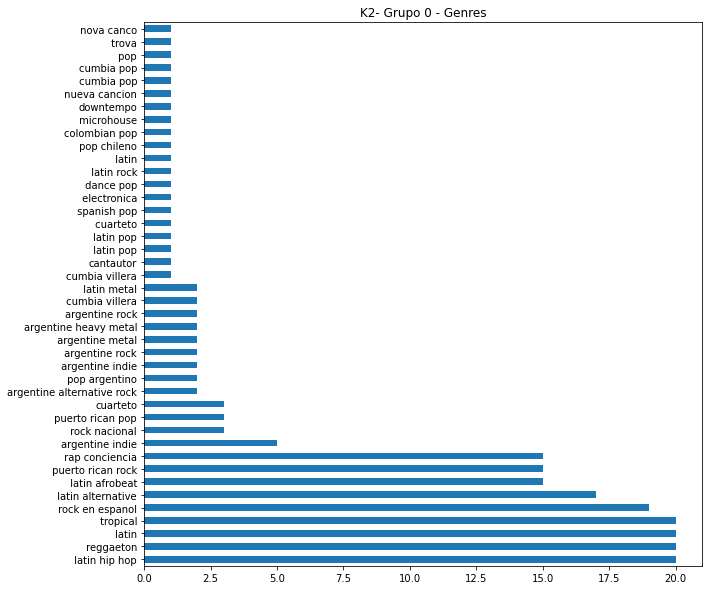

In [30]:
(fig, axs) = plt.subplots(figsize=(10, 10), sharey=False)
get_genres_series_from_group(df_song_base_group, column_group_name='clusters_K2', 
                             group_label=0).value_counts().plot(kind='barh')
axs.set_title('K2- Grupo 0 - Genres')

Text(0.5, 1.0, 'K2- Grupo 1 - Genres')

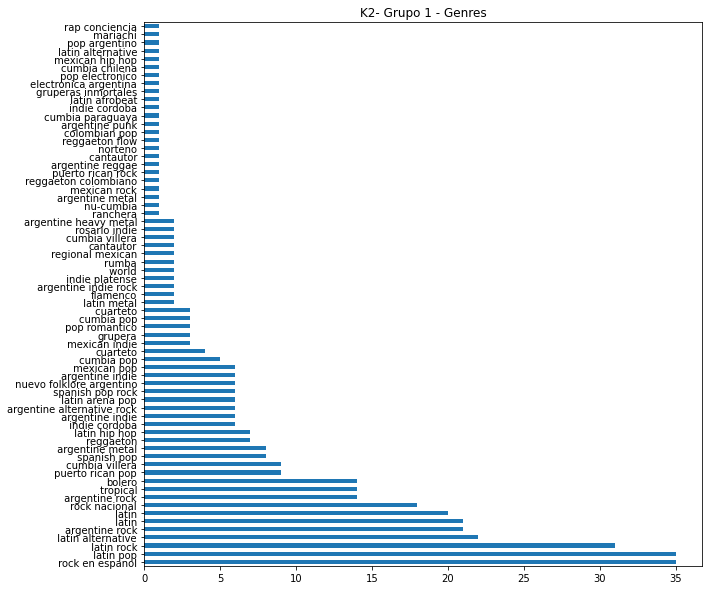

In [31]:
(fig, axs) = plt.subplots(figsize=(10, 10), sharey=False)
get_genres_series_from_group(df_song_base_group, column_group_name='clusters_K2', 
                             group_label=1).value_counts().plot(kind='barh')
axs.set_title('K2- Grupo 1 - Genres')

Text(0.5, 1.0, 'K2- Grupo 2 - Genres')

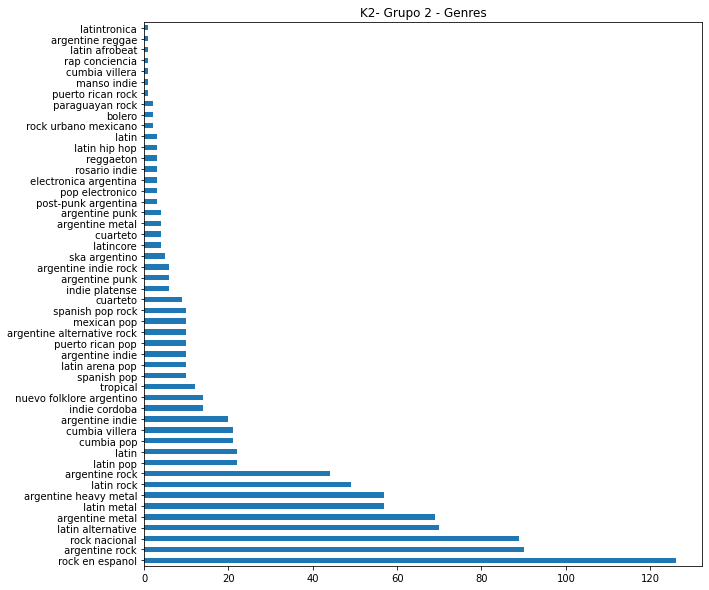

In [32]:
(fig, axs) = plt.subplots(figsize=(10, 10), sharey=False)
get_genres_series_from_group(df_song_base_group, column_group_name='clusters_K2', 
                             group_label=2).value_counts().plot(kind='barh')
axs.set_title('K2- Grupo 2 - Genres')

Text(0.5, 1.0, 'K2- Grupo 3 - Genres')

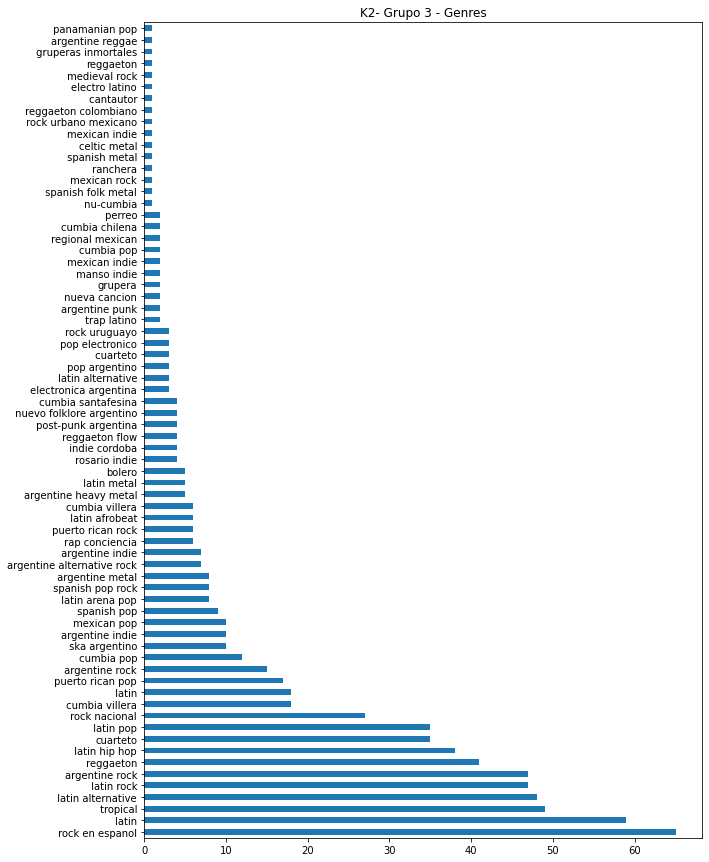

In [39]:
(fig, axs) = plt.subplots(figsize=(10, 15), sharey=False)
get_genres_series_from_group(df_song_base_group, column_group_name='clusters_K2', 
                             group_label=3).value_counts().plot(kind='barh')
axs.set_title('K2- Grupo 3 - Genres')

Text(0.5, 1.0, 'K2- Grupo 4 - Genres')

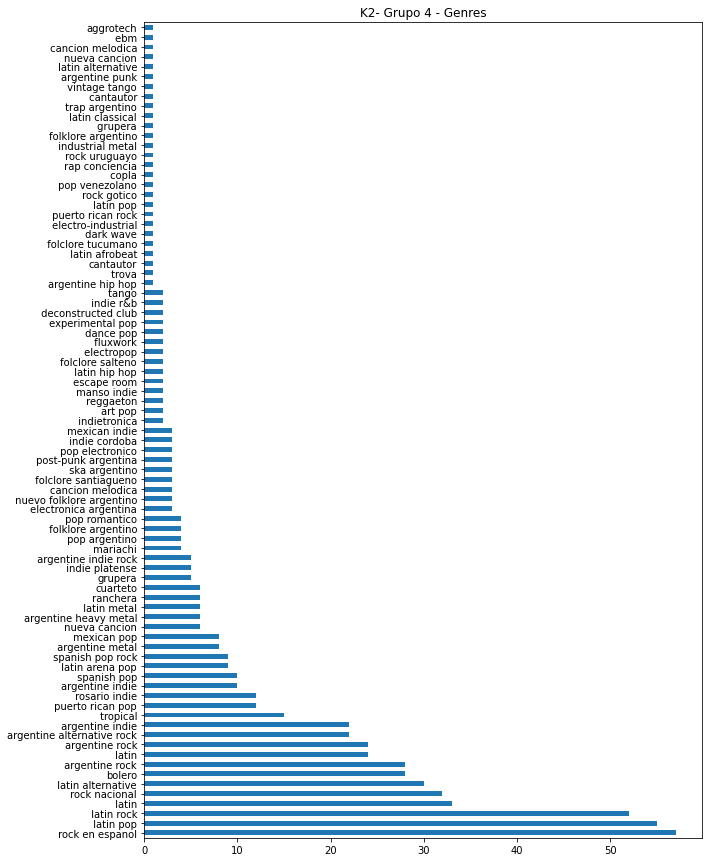

In [35]:
(fig, axs) = plt.subplots(figsize=(10, 15), sharey=False)
get_genres_series_from_group(df_song_base_group, column_group_name='clusters_K2', 
                             group_label=4).value_counts().plot(kind='barh')
axs.set_title('K2- Grupo 4 - Genres')

Text(0.5, 1.0, 'K2- Grupo 5 - Genres')

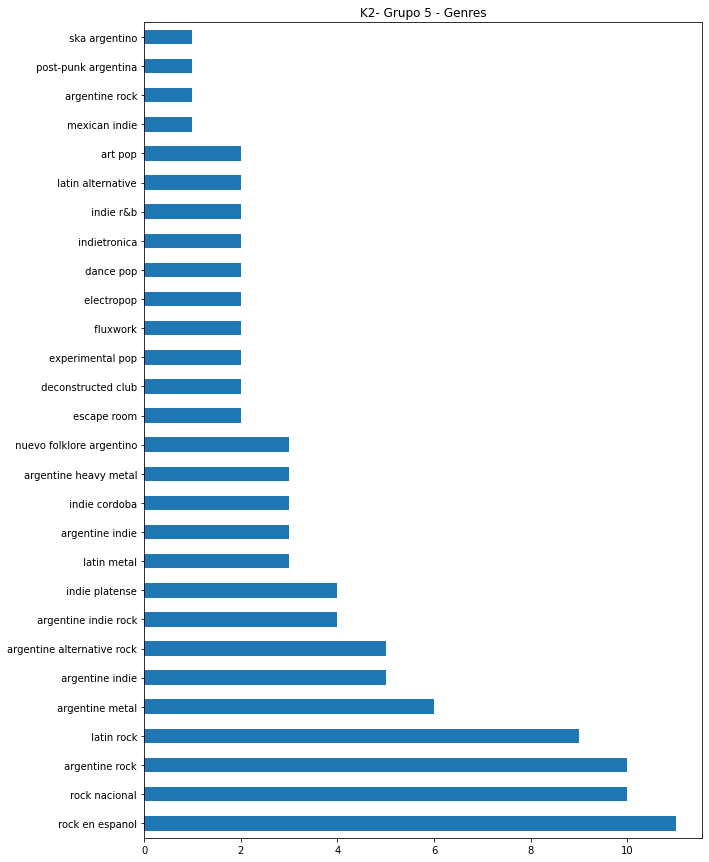

In [36]:
(fig, axs) = plt.subplots(figsize=(10, 15), sharey=False)
get_genres_series_from_group(df_song_base_group, column_group_name='clusters_K2', 
                             group_label=5).value_counts().plot(kind='barh')
axs.set_title('K2- Grupo 5 - Genres')

Text(0.5, 1.0, 'K2- Grupo 6 - Genres')

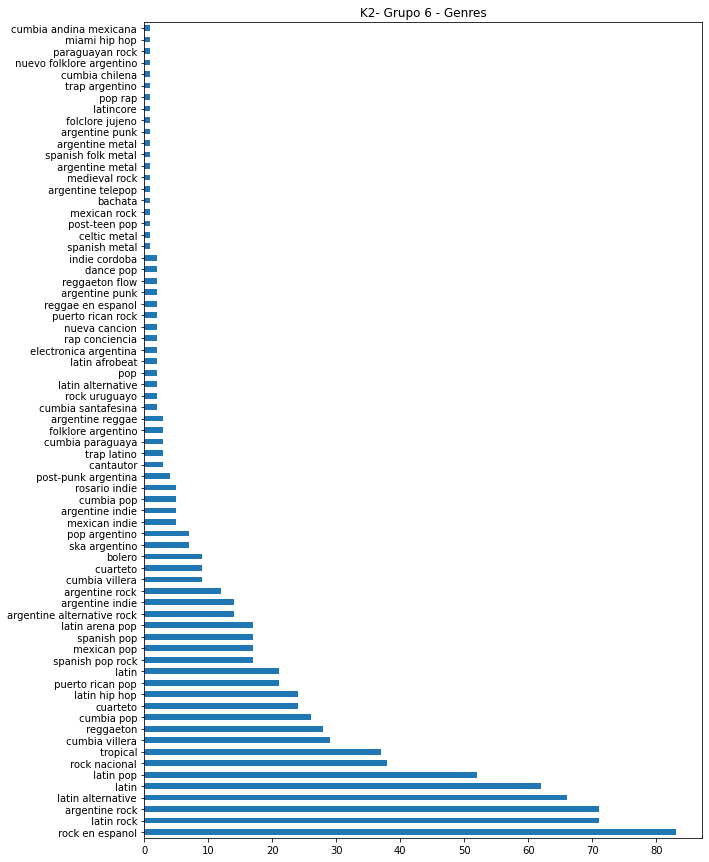

In [40]:
(fig, axs) = plt.subplots(figsize=(10, 15), sharey=False)
get_genres_series_from_group(df_song_base_group, column_group_name='clusters_K2', 
                             group_label=6).value_counts().plot(kind='barh')
axs.set_title('K2- Grupo 6 - Genres')